In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import json
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [32]:
## find how many validators have been elected who are not in the eligible targets
lazy_nominators_sets = {}
non_active_validators_sets = {}
for era in range(600,999):

    with open(f'../data_collection/data/snapshot_data/{era}_snapshot.json') as f:
        data = json.load(f)
    voters = data['voters']
    targets = data['targets']
    lazy_nominators = set()
    non_active_validators = set()
    for row in voters:
        for validator in row[2]:
            if validator not in targets:
                lazy_nominators.add(row[0])
                non_active_validators.add(validator)
    lazy_nominators_sets[era] = lazy_nominators
    non_active_validators_sets[era] = non_active_validators

In [49]:
lazy_nominators_df = pd.DataFrame.from_dict(lazy_nominators_sets, orient='index')
non_active_validators_df = pd.DataFrame.from_dict(non_active_validators_sets, orient='index')

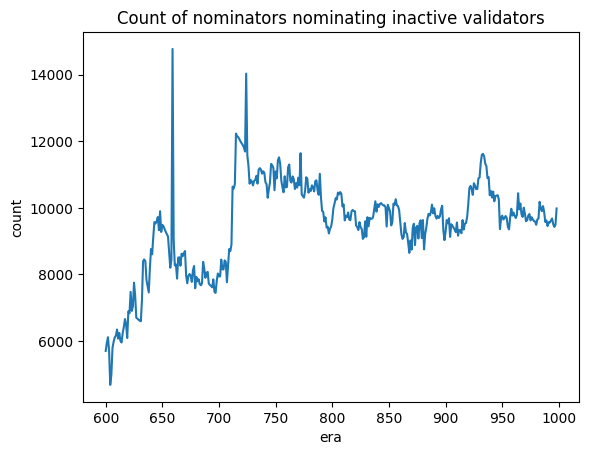

In [34]:
plt.plot(lazy_nominators_df.index, lazy_nominators_df.count(axis=1))
plt.xlabel('era')
plt.ylabel('count')
plt.title('Count of nominators nominating inactive validators')
plt.show()

In [53]:
lazy_nominators_df['count'] = lazy_nominators_df.count(axis=1)
#get era where count is max
lazy_nominators_df.loc[lazy_nominators_df['count'].idxmax()]

0        12tzfAJuWVgrCUFffokvCuRWDPQx55ovess3nXcXywZ9dWHj
1         1zoBNvqaBk2Tc4ApsSK6uFh2FLShDFpEpxh2BU4N7LLMjGh
2        16d8Qb1uiyPnJgpz8u3dCjXxeDxRJJDcf2dJ86qNcxEjgjZo
3        131L4kLo2doyncarQ7gZ42fC8vtyRfGM1FdTwohTYdcS9gdx
4        12MnMPHgvUNXdrisN7cCF7W84DTkieRBqwVP5iAuUpnzfQPR
                               ...                       
14769    153abKSw64PyUVZbhUASqynGp9pjr6iDFDYXxqN9j8DMmMFC
14770    14Zx5KDaWduy3qB1UCwfUrEbUVZcfc7ko7BHXPmYeta7LaeM
14771    12TFzsgta73w3MS8cFsaiwdSa3tHA5ckwfbALzZcNCpBj9oz
14772    12mKLxKoU5rjK2aWhVFu8BVfAhWm8wMtTDTmMv4biMvDoNN1
count                                               14774
Name: 659, Length: 14774, dtype: object

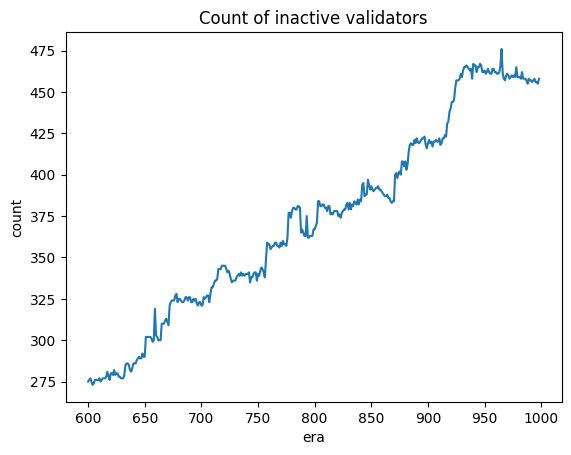

In [35]:
plt.plot(non_active_validators_df.index, non_active_validators_df.count(axis=1))
plt.xlabel('era')
plt.ylabel('count')
plt.title('Count of inactive validators')
plt.show()

In [54]:
df = pd.read_csv('../data_collection/data/processed_data/model_1_data_994.csv')
dataframes = []
for era in range(600, 965):
    dataframes.append(pd.read_csv(f'../data_collection/data/processed_data/model_1_data_{era}.csv'))
dfs = pd.concat(dataframes)

In [56]:
df.memory_usage().sum()

67664

In [5]:
df.describe()


,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era
count,1.206000e+03,1.206000e+03,1206.000000,1206.000000,1206.000000,1206.0
mean,5.754008e+16,5.113951e+15,192.281924,0.246269,0.246269,994.0
std,9.301268e+16,7.643655e+15,411.687504,0.431016,0.431016,0.0
min,3.039152e+12,2.042399e+11,1.000000,0.000000,0.000000,994.0
25%,1.880924e+14,1.544133e+13,3.000000,0.000000,0.000000,994.0
50%,7.232969e+15,5.939536e+14,13.000000,0.000000,0.000000,994.0
75%,7.584821e+16,1.123637e+16,182.000000,0.000000,0.000000,994.0
max,4.705575e+17,4.404996e+16,3954.000000,1.000000,1.000000,994.0


In [4]:
df.head()

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era
0,111B8CxcmnWbuDLyGvgUmRezDCK1brRZmvUuQ6SrFdMyc3S,20823552826875551,1.008494e+16,200,1,1,994
1,1123RekaPHgWaPL5v9qfsikRemeZdYC4tvKXYuLXwhfT3NKy,7375432213048161,7.536657e+14,367,0,1,994
2,1124RsfEgJEZvEq4HbtGFcpqoxnqSy79EjNZY9tzPct3AB6o,1144044728005697,1.558923e+14,77,0,0,994
3,112A6wJPeDsf34nsqoAkAtQ8n74vJU8qmyKMtzX7ZPQH2kXa,91429596023529,9.848139e+12,15,0,0,994
4,112EMfAnjR92TPqp7eKNGwiDwFGS41gJ3MWr5MPyJkyidLLc,804897449684319,6.666237e+13,52,0,0,994


In [5]:
df.shape

(1206, 7)

In [120]:
sns.displot(df, x='overall_total_bond', kde=True)

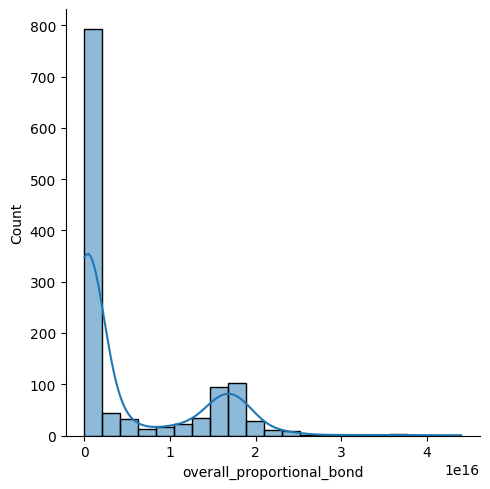

In [51]:
sns.displot(df, x='overall_proportional_bond', kde=True)

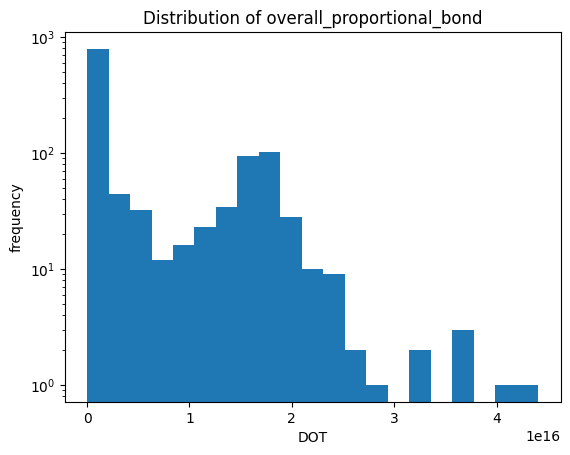

In [78]:
bins = np.histogram_bin_edges(df.groupby("validator")['overall_proportional_bond'].first(), bins="auto")
plt.hist(df['overall_proportional_bond'], bins=bins, alpha=1)
plt.yscale('log')
plt.title("Distribution of overall_proportional_bond")
plt.xlabel("DOT")
plt.ylabel("frequency")
plt.show()

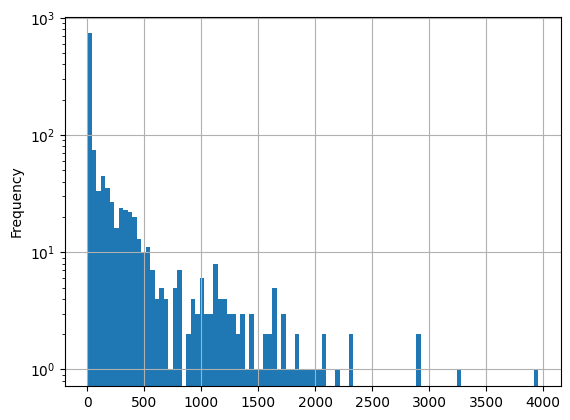

In [36]:
df['nominator_count'].plot.hist(bins=100)
plt.grid()
plt.yscale('log')
#sns.displot(df, x='nominator_count', kde=True)

In [41]:
df['elected_current_era'].value_counts()

elected_current_era
0    909
1    297
Name: count, dtype: int64

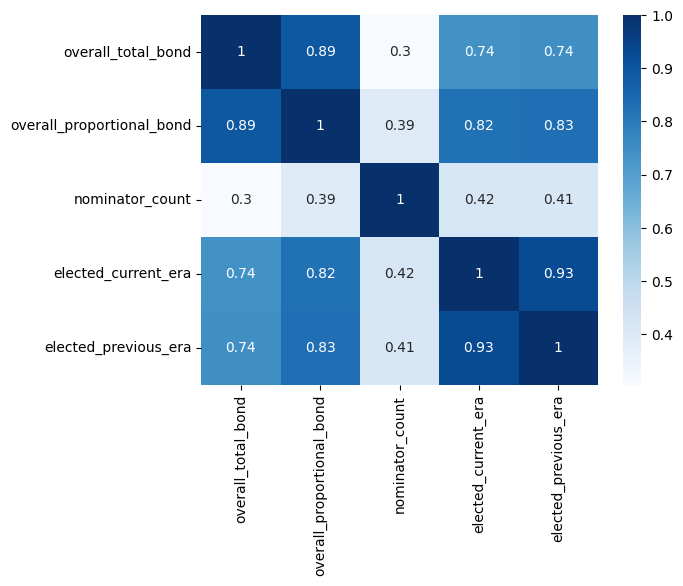

In [140]:
# correlation matrix with sns
df_corr = df.copy()
df_corr.drop(["validator", "era"], axis=1, inplace=True)
corr = df_corr.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True,
            cmap="Blues")
plt.show()

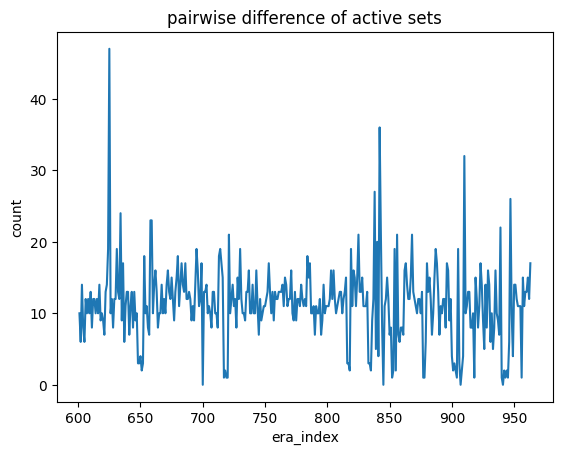

In [57]:
era_index = []
set_difference = []
for i in range(600,965):
    df1 = set(dfs[(dfs['era'] == i) & (dfs['elected_current_era'] == 1)]['validator'])
    df2 = set(dfs[(dfs['era'] == i+1) & (dfs['elected_current_era'] == 1)]['validator'])
    era_index.append(i)
    set_difference.append(len(df1.difference(df2)))
plt.title("pairwise difference of active sets")
plt.xlabel("era_index")
plt.ylabel("count")
plt.plot(era_index[1:-1], set_difference[1:-1])

In [83]:
# set the elected counter equal at all validators of same address.
validators = set(dfs.validator.unique())
count_adapted_df = dfs.copy()
for validator in validators:
    count_adapted_df.loc[count_adapted_df['validator'] == validator, 'elected_counter'] = len(count_adapted_df.loc[(count_adapted_df['validator'] == validator) & (count_adapted_df['elected_current_era'] == 1)])
count_adapted_df.head()

,validator,overall_total_bond,overall_proportional_bond,nominator_count,elected_current_era,elected_previous_era,era,elected_counter
0,111B8CxcmnWbuDLyGvgUmRezDCK1brRZmvUuQ6SrFdMyc3S,20512588154036345,3.011515e+15,140,1,1,600,362.0
1,1124RsfEgJEZvEq4HbtGFcpqoxnqSy79EjNZY9tzPct3AB6o,91933819578259145,5.797898e+15,403,1,1,600,254.0
2,112A6wJPeDsf34nsqoAkAtQ8n74vJU8qmyKMtzX7ZPQH2kXa,238491180689120645,1.492956e+16,121,1,1,600,26.0
3,114SUbKCXjmb9czpWTtS3JANSmNRwVa4mmsMrWYpRG1kDH5,201807329737795854,2.075172e+16,350,1,1,600,365.0
4,1155dDdp1X4F3rh35hAMoK8r4iDVdzprtRpVrScP35YPC2b,1232865053357,1.119054e+11,2,0,0,600,0.0


In [84]:
validator_frequency = count_adapted_df.groupby("validator")['elected_counter'].first().reset_index()

In [ ]:

grouped_df['elected_counter'] = grouped_df['elected_counter'].div(grouped_df['elected_counter'].sum())
#plt.hist(grouped_df['index'], 200, histtype="stepfilled", alpha=.7, cumulative=-1)
cumsum = np.cumsum(grouped_df['elected_counter'])
plt.plot(grouped_df['index'], cumsum, )
plt.xlabel('fraction of era elected')
plt.ylabel('fraction of validators')
plt.title('Cumulative elected validator distribution')

In [100]:
value_counts_elected = validator_frequency['elected_counter'].value_counts().reset_index().sort_values(by="elected_counter", ascending=False)

In [101]:
value_counts_elected['fraction_of_validators'] = value_counts_elected['count'].div(value_counts_elected['count'].sum())
value_counts_elected['fraction_of_eras'] = value_counts_elected['elected_counter'].div(value_counts_elected['elected_counter'].max())
value_counts_elected['fraction_of_validators_cumsum'] = np.cumsum(value_counts_elected['fraction_of_validators'])

In [102]:
value_counts_elected

,elected_counter,count,fraction_of_validators,fraction_of_eras,fraction_of_validators_cumsum
1,365.0,122,0.091867,1.000000,0.091867
5,364.0,11,0.008283,0.997260,0.100151
53,363.0,4,0.003012,0.994521,0.103163
11,362.0,8,0.006024,0.991781,0.109187
105,361.0,2,0.001506,0.989041,0.110693
...,...,...,...,...,...
2,4.0,33,0.024849,0.010959,0.518825
10,3.0,9,0.006777,0.008219,0.525602
65,2.0,3,0.002259,0.005479,0.527861
4,1.0,13,0.009789,0.002740,0.537651


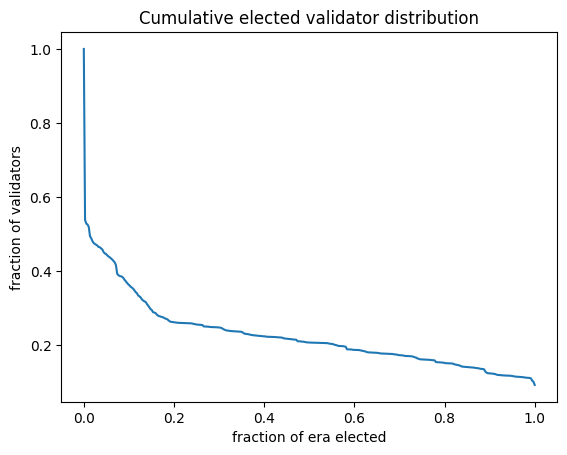

In [125]:
plt.plot(value_counts_elected['fraction_of_eras'], value_counts_elected['fraction_of_validators_cumsum'])
plt.xlabel('fraction of era elected')
plt.ylabel('fraction of validators')
plt.title('Cumulative elected validator distribution')
plt.show()

In [114]:
loser_df = count_adapted_df.copy()
loser_df = loser_df.loc[(loser_df['elected_counter'] == 0) & (loser_df['elected_current_era'] == 0)]
describe_loser_df = loser_df.describe()
describe_loser_df.reset_index(inplace=True)
describe_loser_df = describe_loser_df[describe_loser_df['index'] != 'count']
describe_loser_df.columns

Index(['index', 'overall_total_bond', 'overall_proportional_bond',
       'nominator_count', 'elected_current_era', 'elected_previous_era', 'era',
       'elected_counter'],
      dtype='object')

In [115]:
winner_df = count_adapted_df.copy()
winner_df = winner_df.loc[winner_df['elected_counter'] == 365]
describe_winner_df = winner_df.describe()
describe_winner_df.reset_index(inplace=True)
describe_winner_df = describe_winner_df[describe_winner_df['index'] != 'count']

In [116]:
concated_dfs = []
for index, column in enumerate(describe_winner_df.columns):
    concated_dfs.append(pd.concat([describe_winner_df[column], describe_loser_df[column]], axis=1))
    concated_dfs[index].columns = ["winner", "loser"]

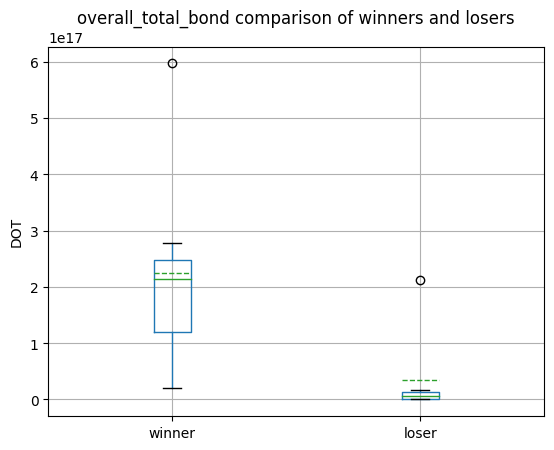

In [131]:
concated_dfs[1].boxplot(meanline=True, showmeans=True)
plt.title("overall_total_bond comparison of winners and losers")
plt.ylabel("DOT")
plt.show()

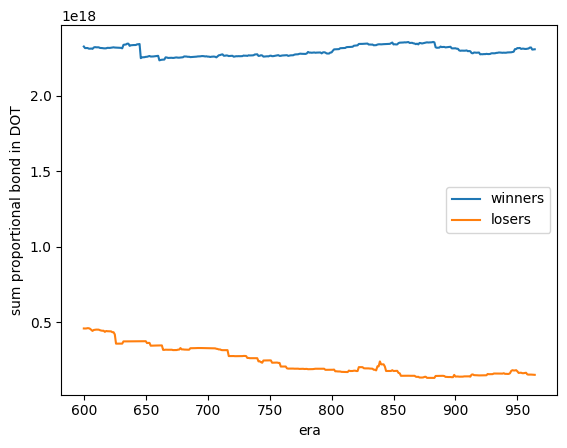

In [135]:
proportional_bonds_winners = winner_df.groupby("era").sum('overall_proportional_bond').reset_index()
proportional_bonds_losers = loser_df.groupby("era").sum('overall_proportional_bond').reset_index()
plt.plot(proportional_bonds_winners['era'], proportional_bonds_winners['overall_proportional_bond'])
plt.plot(proportional_bonds_losers['era'], proportional_bonds_losers['overall_proportional_bond'])
plt.xlabel("era")
plt.ylabel("sum proportional bond in DOT")
plt.legend(["winners", "losers"])
plt.show()

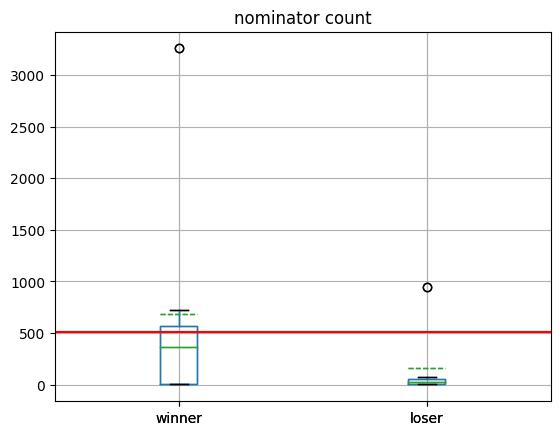

In [137]:
# oversubscribed after 512
concated_dfs[3].boxplot(meanline=True, showmeans=True)
plt.axhline(512, c='r')
plt.title("nominator count")
plt.show()